In [1]:
# Einstellungen fuer Plots

imagewidth = 800
plot_size = (18, 10)
half_plot_size = (18, 6)

In [2]:
%matplotlib inline
import numpy as np
np.random.seed(42)
import pandas as pd
import seaborn as sns
import math

from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

In [3]:
# Change style according to FH
import matplotlib.pyplot as plt
plt.style.use('img/fh_kiel.mplstyle')
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from palettable.colorbrewer.qualitative import Paired_8 as q_map



plt.set_cmap(q_map.mpl_colormap)
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

blue = '#30414D'
green = '#006A4D'
orange = '#E3AB44'
dark_red = '#C55024'
alarm_red = '#E20020'
light_green = '#7AB51D'

cmap_kiel = ListedColormap(['#30414D', '#E3AB44', '#C55024'])
cmap_kiel2 = ListedColormap(['#30414D', '#E3AB44']);

<Figure size 640x480 with 0 Axes>

# Grundlagen Maschinelles Lernen

## Fundamentals of Machine Learning


Prof. Dr.-Ing. Daniel Böhnke

<div style="text-align: right"> Woche 7 </div>

# Gini Index

$$G = \sum_{k=1}^K \hat{p}_{mk}(1-\hat{p}_{mk})$$

* Der Gini Index beschreibt die Klassen-Reinheit eines Knotens.
* Über alle Klassen $k$ wird in der Region (dem Knoten) $m$ die Wahrscheinlichkeit addiert.
* Im besten Fall ist der Gini-Index sehr nah an der Null.
* In unserem einfachen Fall, kommen wir schon mit Abzählen weiter.

# CART (Classification and Regression Tree)

* In einem Entscheidungsbaum wird in jedem Knoten nach einem Parameter und an einer Schwelle eine Entscheidung getroffen, d.h. die Daten in verschiedene Äste aufgeteilt. 
* Gesucht wird der richtige Parameter $x_{1,\dots,n}$ und der richtige Schwellwert $t$

$$J(l, t_l) = \frac{m_{links}}{m}G_{links} + \frac{m_{rechts}}{m}G_{rechts}$$

* $m$ entspricht der Anzahl der verbleibenden Samples.
* $l$ entspricht dem Index des Parameter, i.e. $x_l$.
* Der Parameter, der das minimale $J$ erreicht, wird für die Entscheidung in einem Knoten gewählt.


# J(t) für den Autodatensatz

<center><img src="img/screen_jt.png" width=60% class="stretch"></center>

# Steckbrief Entscheidungsbaum

<center><img src="img/tafel_cart.png" width=60% class="stretch"></center>

# Lernlandkarte 
<center><img src="img/lernlandkarte.png" width=80% class="stretch"></center>

# Heute 

* Beim Feature Engineering fehlen noch zwei wichtige Bestandteile: 
    * Rotation des Datensatzes
    * Einsatz von Domänenwissen
* Die Entscheidungsbäume stellen "schwache" Modelle dar. Mit sogenannten Ensemble Methoden können Sie massiv verbessert werden: 
    * Bagging
    * Random Forests
    * (Ada-) Boosting 

# Rotation

<center><img src="img/tafel_rotation.png" width=40% class="stretch"></center>

* $x_1$ und $x_2$ sind die ursprünglichen Achsen der Daten.
* Hier kommt es aber zu großen Überlappungen, die eine Klassifizierung erschweren.
* Wäre $x_{R1}$ nicht die bessere Alternative, um die Daten darzustellen?

# Hauptkomponentenanalyse

* Wir suchen nach einem neuen Koordinatensystemen (KS) $Z$, welches unsere Daten gut beschreibt!
* Das Ziel ist es, entlang der ersten Achse des neuen KS die Varianz zu maximieren.
* Das neue KS $Z$ baut sich zusammen aus den einzelnen Koordinaten des alten KS multipliziert mit einem Faktor $\phi$: 

$$Z_1 = \phi_{11}X_1 + \phi_{21}X_2 +\dots+\phi_{p1}X_p $$

* Beziehungsweise:

$$Z_1 = \phi_{horsepower, 1}X_{horsepower} + \phi_{weight, 1}X_{weight}$$

* Um das Ziel zu erreichen, müssen wir folgende Forderungen stellen: 
    * Die Summe alle $\phi^2$ in einer Richtung von $Z$ ist gleich 1.
    * Alle $\phi$ sollen so gewählt werden, dass die Varianz maximal wird.
    
* Um eine saubere Betrachtung zu ermöglichen, müssen die ursprünglichen Spalten normiert werden!
* Das führt uns zu folgendem Optimierungsproblem, dessen Lösung wir aber bestehenden Bibliotheken überlassen:

$$\max_{\phi_{11}, \dots, \phi_{p1}} \frac{1}{n}\sum_{i=1}^n\left( \sum_{j=1}^p \phi_{j1}x_{ij} \right) ^2$$



# Beispiel: Dimensionsreduktion Farbbild

<center><img src="img/pca_auto.png" width=60% class="stretch"></center>

* Aufgabe: Generieren Sie ein Schwarz-Weiß-Bild, welches die größtmögliche Menge von Informationen erhält. 
* Methode: Es wird eine Hauptkomponenten Analyse durchgeführt. Die erste Achse wird als Schwarz-Weiß-Bild verwendet


*Quelle: Vranic, 3D Model Retrieval, 2003*

# Experiment: Principal Component Analysis (PCA)

* Wir versuchen `Fuel Saver` basierend auf `Year` und `Horsepower` vorherzusagen.
* Die Daten werden z-normalisiert.
* Es wird eine Entscheidungsbaum mit maximaler Tiefe von 3 eingesetzt.
* Der Entscheidungsbaum wird einmal mit `Year` und `Horsepower` trainiert und einmal mit rotierten Daten.
* Wir vergleichen den F1 Score.

In [4]:
# Lade den Auto Datensatz, eliminiere Missing Values
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Auto.csv')
df['horsepower'] = np.where(df['horsepower']=='?', None, df['horsepower'])
df = df.dropna()
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['weight'] = pd.to_numeric(df['weight'])
df['fuel_saver'] = np.where(df['mpg']>30, 1, 0)

features = ['weight', 'horsepower', 'acceleration', 'displacement', 'year']
for f in features:
    df[f] = StandardScaler().fit_transform(df[f].values.reshape(-1, 1))

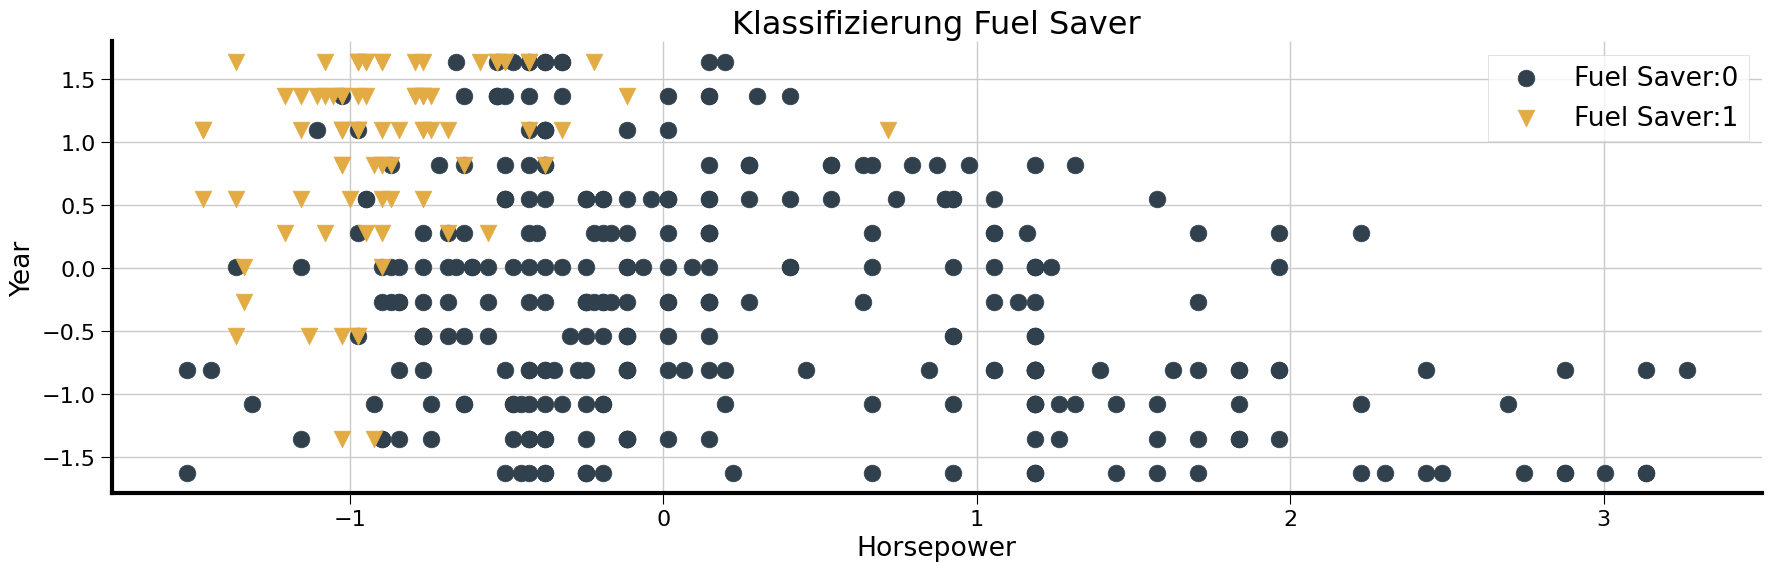

In [5]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

for i in range(2):
    plt.scatter(df[df['fuel_saver'] == i].horsepower, df[df['fuel_saver'] == i].year, marker=filled_markers[i], label='Fuel Saver:' + str(i))

ax.legend()

plt.title('Klassifizierung Fuel Saver')
plt.ylabel('Year')
plt.xlabel('Horsepower')
plt.tight_layout()
plt.show()


# Entscheidungsbaum mit normalisiertem Horsepower und Year

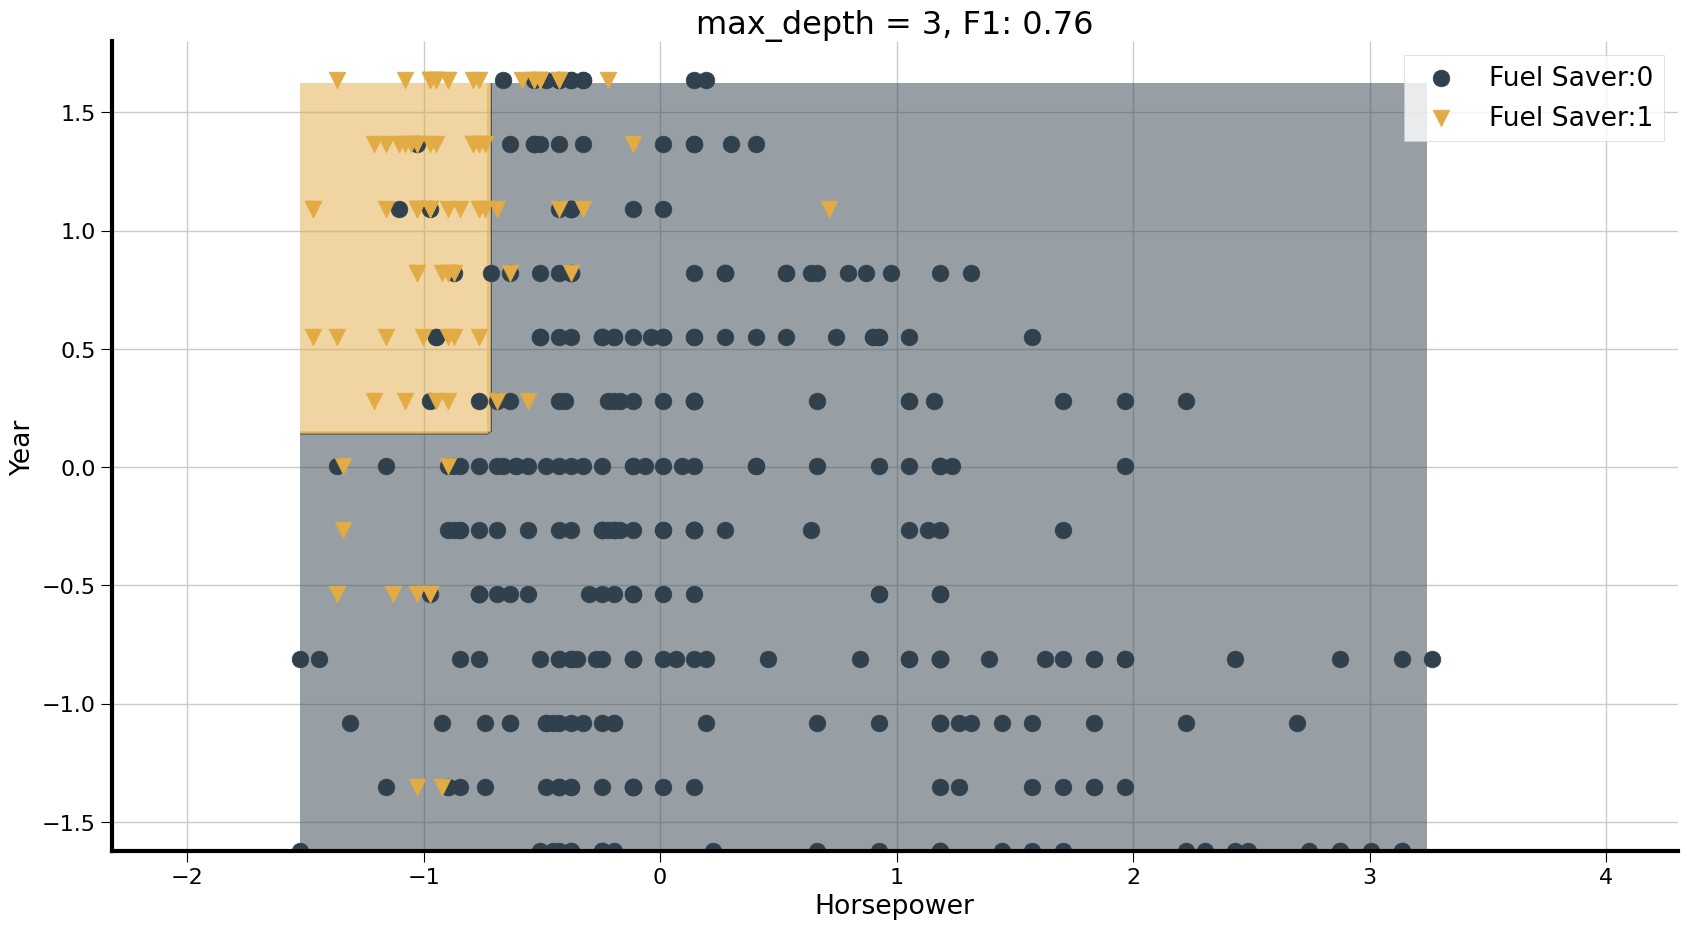

In [6]:
from sklearn.metrics import f1_score

# Plotte die Entscheidungsgrenze
fig, ax = plt.subplots(1, 1, figsize=plot_size)

X = df[['horsepower', 'year']]
y = df[['fuel_saver']]

estimator = DecisionTreeClassifier(random_state = 0 , criterion = 'gini', max_depth = 3, min_samples_split=0.0001, min_samples_leaf=0.0001)
estimator.fit(X.values, y.values)


x_min, x_max = df['horsepower'].min(), df['horsepower'].max()
y_min, y_max = df['year'].min(), df['year'].max()
n = 200  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)

# Plot also the training points
for i in range(2):
    plt.scatter(df[df['fuel_saver'] == i].horsepower, df[df['fuel_saver'] == i].year, marker=filled_markers[i], label='Fuel Saver:' + str(i))

plt.title('max_depth = 3, F1: %.2f' %f1_score(df['fuel_saver'],estimator.predict(df[['horsepower', 'year']].values)))
plt.ylabel('Year')
plt.xlabel('Horsepower')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.axis('equal')
ax.legend()
plt.show()

# Rotation der Daten in Python

In [7]:
# Führe eine Hauptkomponentenanalyse auf year & horsepower durch
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='randomized')
pca.fit(df[['horsepower', 'year']])
X = pca.transform(df[['horsepower', 'year']])
df['pca1'] = X[:,0]
df['pca2'] = X[:,1]

In [8]:
pca.components_

array([[ 0.70710678, -0.70710678],
       [-0.70710678, -0.70710678]])

# Entscheidungsbaum mit PCA1 und PCA2

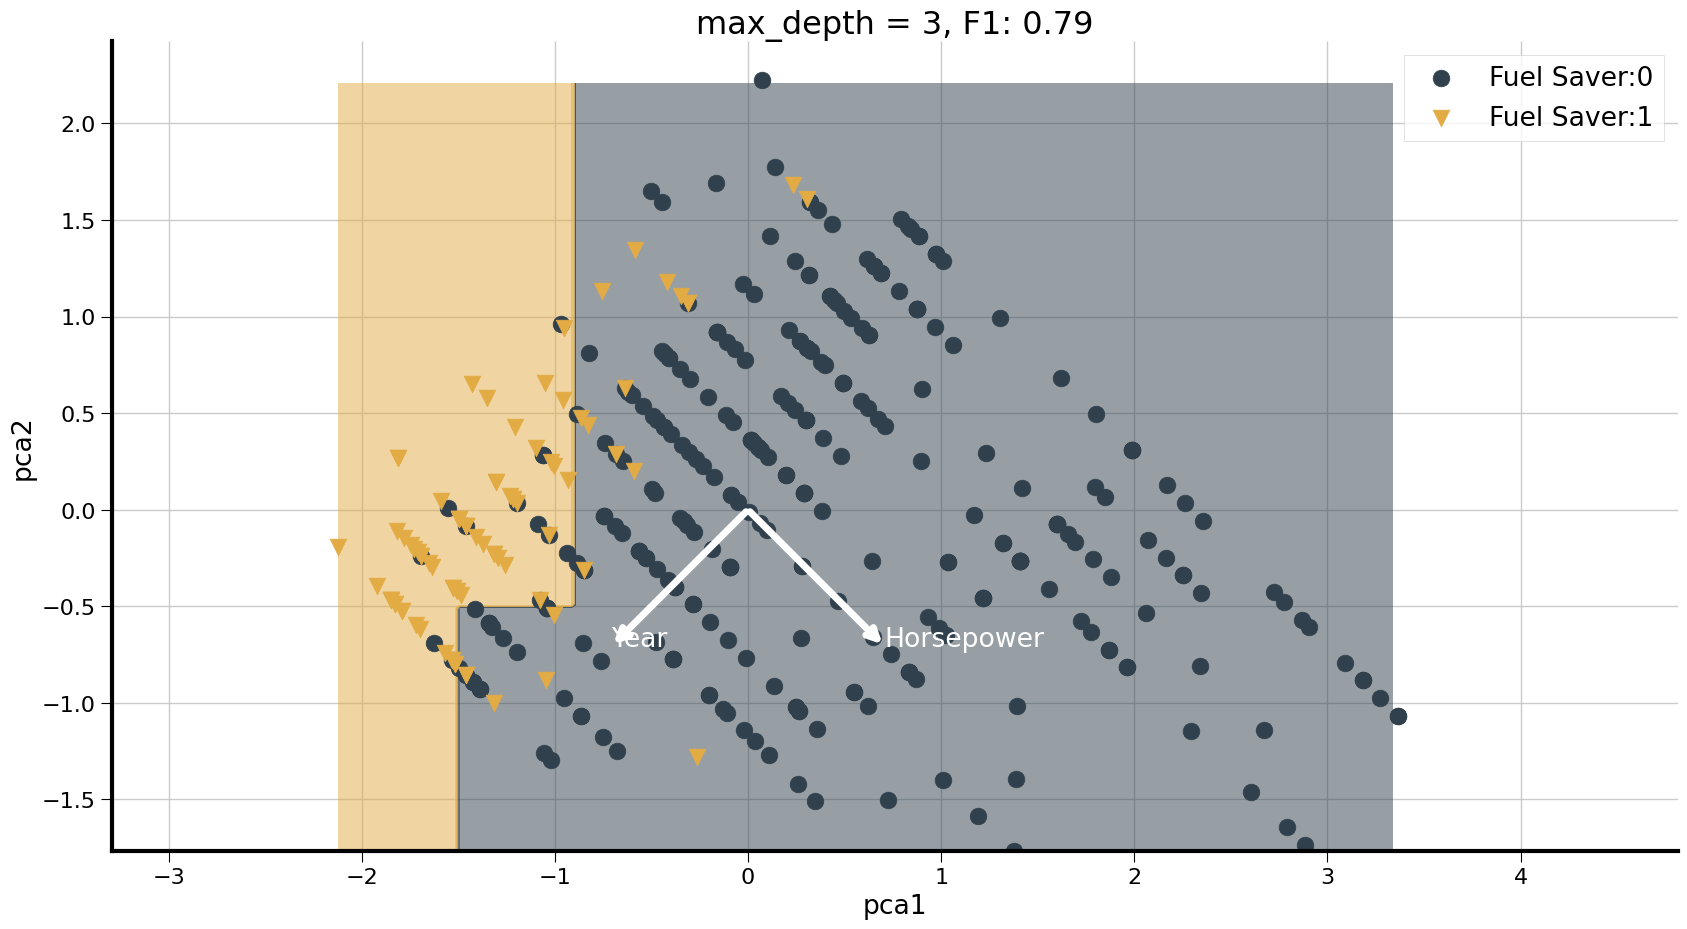

In [9]:
# feature matrix
X = df[['pca1', 'pca2']]

# target vector
y = df['fuel_saver']

# class labels
labels = ['pca1', 'pca2']

estimator = DecisionTreeClassifier(random_state = 0 , criterion = 'gini', max_depth = 3, min_samples_split=0.0001, min_samples_leaf=0.0001)
estimator.fit(X.values, y.values)

# Plotte die Entscheidungsgrenze
fig, ax = plt.subplots(1, 1, figsize=plot_size)

x_min, x_max = df['pca1'].min(), df['pca1'].max()
y_min, y_max = df['pca2'].min(), df['pca2'].max()
n = 200  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)

# Plot also the training points
for i in range(2):
    plt.scatter(df[df['fuel_saver'] == i].pca1, df[df['fuel_saver'] == i].pca2, marker=filled_markers[i], label='Fuel Saver:' + str(i))
    
for i, l in enumerate(['Horsepower', 'Year']):
    plt.annotate('', xy=(0, 0), xycoords='data',
             xytext=(pca.components_[0][i], pca.components_[1][i]), textcoords='data', color='w',
             arrowprops=dict(facecolor='k', edgecolor='w', lw=5, arrowstyle='<-'), fontsize='large')
    plt.text(pca.components_[0][i], pca.components_[1][i], l, color='w', fontsize='large')


plt.title('max_depth = 3, F1: %.2f' %f1_score(df['fuel_saver'],estimator.predict(df[['pca1', 'pca2']].values)))
plt.ylabel('pca2')
plt.xlabel('pca1')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.axis('equal')
ax.legend()
plt.show()

# PCA zur Dimensionsreduzierung

* Die PCA wird versuchen, die Varianz in der ersten, zweiten, usw. Achse zu maximieren.
* Dementsprechend kann die Anzahl der Spalten ggfs. reduziert werden, da der größte Teil der Information bereits in den ersten Spalten enthalten ist.

* Die PCA ermöglicht eine Reduzierung der Inhalte:
    * Bessere Verständlichkeit für manuelle Analyse, bzw. graphische Darstellung
    * Bessere Erfassbarkeit für Algorithmen


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
pca.fit(df[['weight', 'horsepower', 'acceleration', 'displacement', 'year']])
X = pca.transform(df[['weight', 'horsepower', 'acceleration', 'displacement', 'year']])
df['pca1'] = X[:,0]
df['pca2'] = X[:,1]

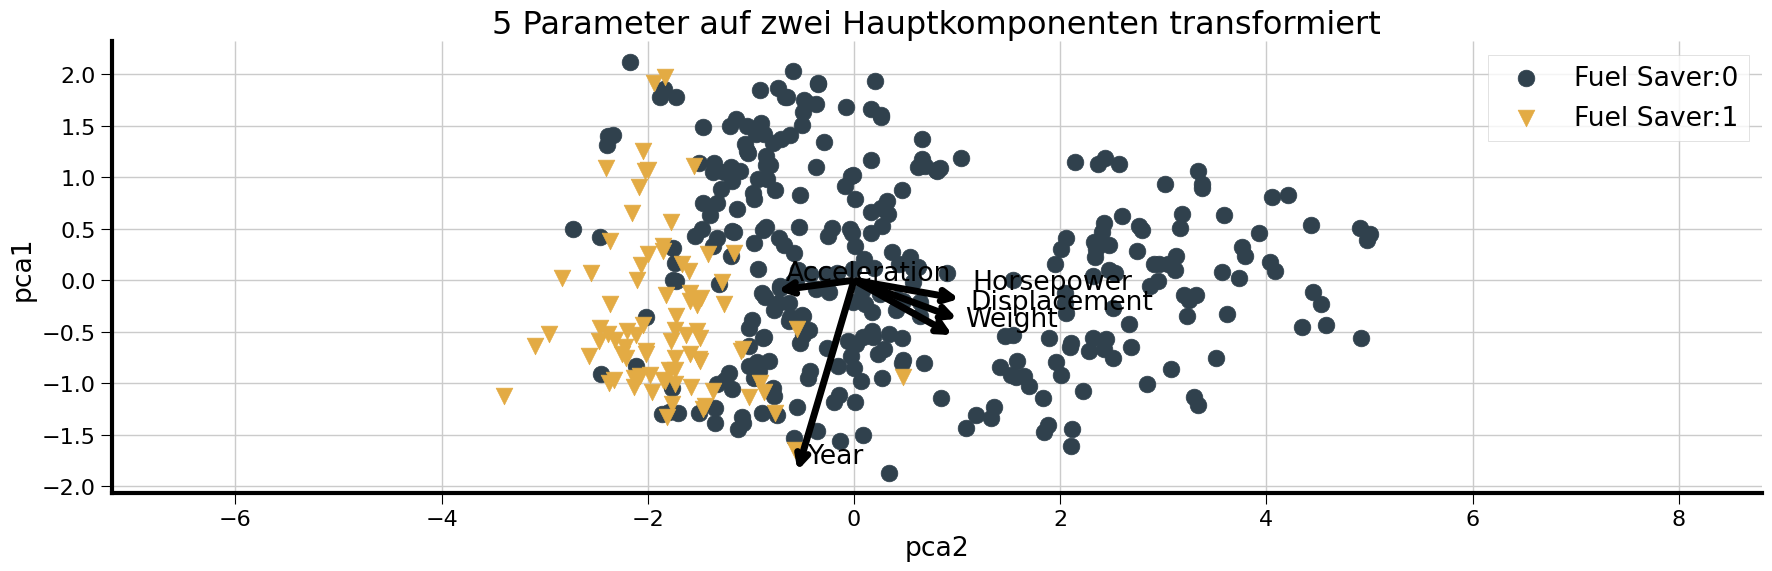

In [11]:
arrow=2
# Plotte Autodaten satz, markiere Fuel Saver

fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

for i in range(2):
    plt.scatter(df[df['fuel_saver'] == i].pca1, df[df['fuel_saver'] == i].pca2, marker=filled_markers[i], label='Fuel Saver:' + str(i))

for i, l in enumerate(['Weight', 'Horsepower', 'Acceleration', 'Displacement', 'Year']):
    plt.annotate('', xy=(0, 0), xycoords='data',
             xytext=(pca.components_[0][i]*arrow, pca.components_[1][i]*arrow), textcoords='data',
             arrowprops=dict(facecolor='k', edgecolor='k', lw=5, arrowstyle='<-'), fontsize='large')
    plt.text(pca.components_[0][i]*arrow+0.1, pca.components_[1][i]*arrow+0.1, l, color='k', fontsize='large')

    
ax.legend()

plt.title('5 Parameter auf zwei Hauptkomponenten transformiert')
plt.ylabel('pca1')
plt.xlabel('pca2')
ax.axis('equal')
plt.tight_layout()
plt.show()


# Erklärte Varianz über die Anzahl der Hauptachsen

* Wenn die Anzahl der Hauptachsen gleich der Anzahl der ursprünglichen Dimensionen ist, wird  die Summe der erklärten Varianzen wieder 1.
* D.h. es werden nicht mehr Informationen verfügbar, Sie sind lediglich besser aufgeteilt

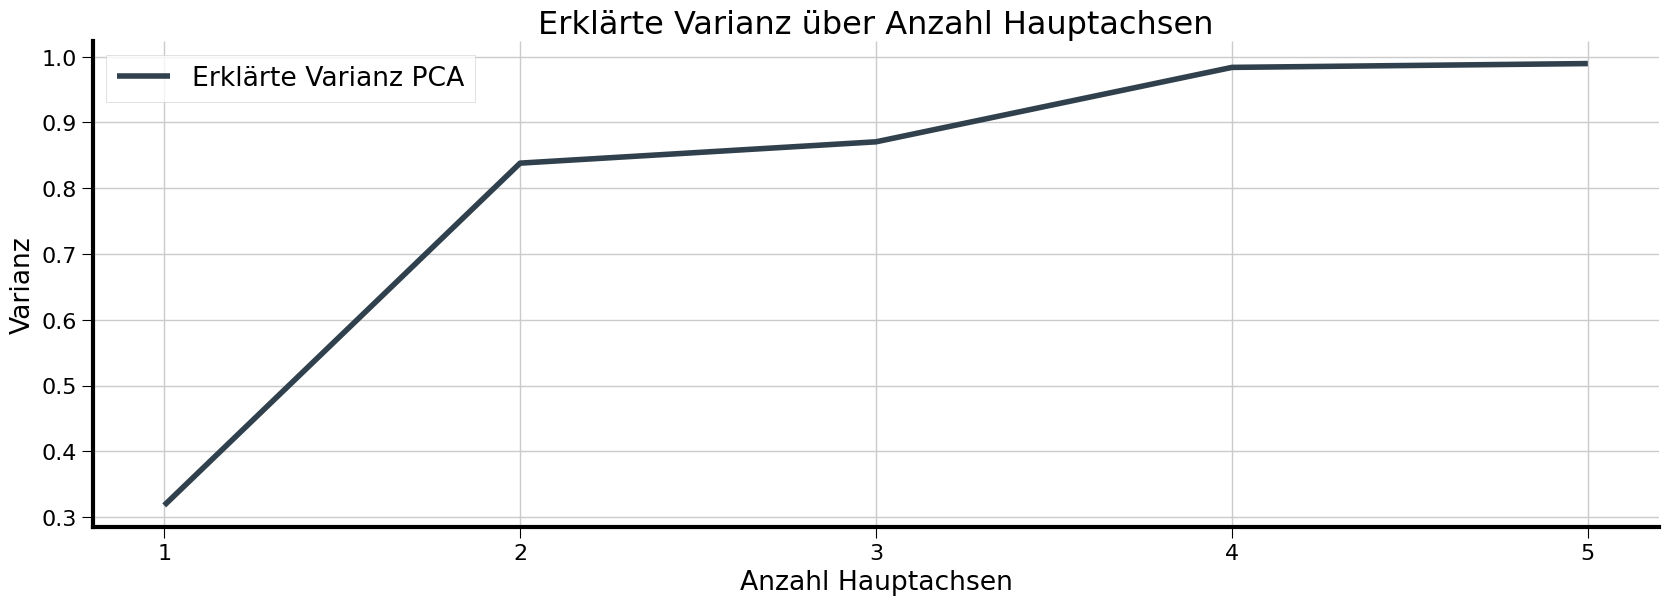

In [12]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

pca = PCA(n_components=5)
pca.fit(df[['weight', 'horsepower', 'acceleration', 'displacement', 'year']])


ax.plot(range(1,6,1),1-pca.explained_variance_ratio_, label='Erklärte Varianz PCA')

ax.legend()
plt.title('Erklärte Varianz über Anzahl Hauptachsen')
plt.xlabel('Anzahl Hauptachsen')
plt.ylabel('Varianz')
plt.xticks(range(1,6));

# Domänen-Wissen

* Welches Wissen steht den Expert*Innen zur Verfügung, welches das Modell nicht kennt?
* Im Feature Engineering wird versucht dieses Wissen für den Algorithmus greifbar zu machen. 
* Man kann hier auch von *Hybriden Modellen* sprechen:
    * Ein Domänen-Modell erweitert die zur Verfügung stehenden Daten.
    * Ein KI-Modell extrahiert Informationen aus diesen Daten.
* Dieses Wissen (diese Modelle) können sehr wertvoll sein, und es wichtig mit den Expert*Innen in Austausch zu treten.
* z.B. Integration von Kennfeldern für Pumpen

# Beispiel Taylor Formel

<center><img style="float: right;" src="img/taylor.png" width=20% class="stretch"></center>

* Ziel: Vorhersage von Verschleiß an der Flanke eines Schneidewerkzeugs
* Teil der Semesteraufgabe 2022
* Idee: Erweitern der Daten, um ein Domänenmodell, um die Vorhersage zu unterstützen.

*Quelle: Major Challenges in Prognostics: Study on Benchmarking Prognostics Datasets, O.F. Ecker et al.*


# Domänen-Wissen Beispiel Autodatensatz

<center><img style="float: right;" src="img/tet.png" width=30% class="stretch"></center>

* Im Gegensatz zum Modell ist uns Technologie-Entwicklung über Zeit bewußt.
* Wie könnte dies auf den Autodatensatz übertragen werden?


* Wir führen einen neuen Parameter **domain_model** ein

**<center> $x_{domain} = x_{weight} e^{x_{year}}$</center>**

*Quelle: Flugzeugtriebwerke: Grundlagen, Aero-Termodynamik, ideale und reale Kreisprozesse, thermische Turbomaschinen, Komponenten, Emissionen und Systeme, Braeunling, W. J. G., 2009*

# Entscheidungsbaum mit Domänenwissen

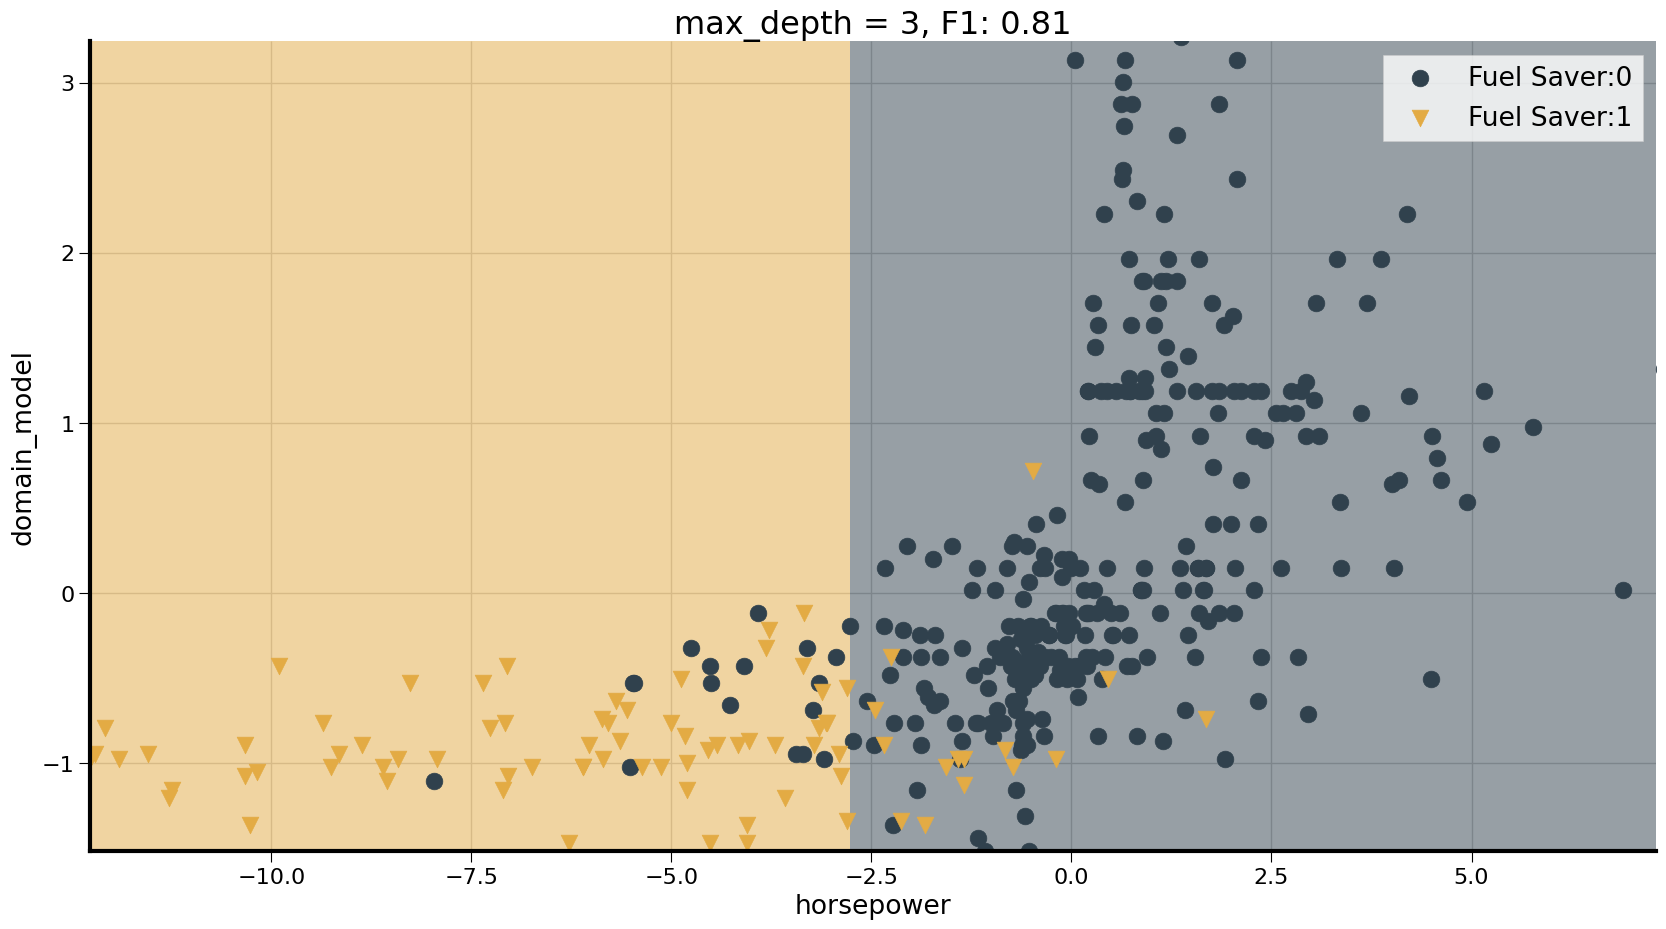

In [13]:
df['domain_model'] = df['weight'] * 2 * np.exp(df['year'])
vals = ['domain_model', 'horsepower']

# feature matrix
X = df[vals]

# target vector
y = df['fuel_saver']

# class labels
labels = vals

estimator = DecisionTreeClassifier(random_state = 0 , criterion = 'gini', max_depth = 2, min_samples_split=0.0001, min_samples_leaf=0.0001)
estimator.fit(X.values, y.values)


# Plotte die Entscheidungsgrenze
fig, ax = plt.subplots(1, 1, figsize=plot_size)

x_min, x_max = df['domain_model'].min(), df['domain_model'].max()
y_min, y_max = df['horsepower'].min(), df['horsepower'].max()
n = 200  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)

# Plot also the training points
for i in range(2):
    plt.scatter(df[df['fuel_saver'] == i].domain_model, df[df['fuel_saver'] == i].horsepower, marker=filled_markers[i], label='Fuel Saver:' + str(i))

plt.title('max_depth = 3, F1: %.2f' %f1_score(df['fuel_saver'],estimator.predict(df[vals].values)))
plt.ylabel('domain_model')
plt.xlabel('horsepower')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.legend()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# feature matrix
X = df[['horsepower', 'weight', 'mpg', 'displacement', 'cylinders']]

# target vector
y = df['origin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ensemble Methoden

- Kombination mehrerer Modelle, um bessere Vorhersagen zu erzielen
- Ziel: Verbesserung von Genauigkeit, Robustheit und Stabilität
- Reduzierung von Overfitting und Modellfehlern


- Haupttypen von Ensemble Methoden:
    - Bagging: Mehrere Modelle mit unterschiedlichen Stichproben des Trainingsdatensatzes trainieren. Vorhersagen durch Mehrheitsentscheidung oder Mittelung aggregieren
    - Boosting: Sequenzielles Trainieren von Modellen, wobei jedes Modell die Fehler des vorherigen Modells korrigiert; Gewichtung der Vorhersagen basierend auf der Leistung der einzelnen Modelle



# Ensemble Methoden II

- Vorteile von Ensemble Methoden:
    - Bessere Vorhersageleistung als Einzelmodelle
    - Vielfalt der Modelle reduziert Fehler und Overfitting
    - Flexibilität bei der Kombination verschiedener Algorithmen
    - Anwendbar auf Klassifikation, Regression und andere Aufgaben



- Herausforderungen und Nachteile:
    - Erhöhter Rechenaufwand und Speicherbedarf
    - Komplexere Modellstrukturen erschweren Interpretierbarkeit
    - Auswahl und Optimierung der Hyperparameter kann anspruchsvoll sein

# Bagging

<center><img src="img/tafel_bagging.png" width=30% class="stretch"></center>


* Entscheidungsbäume leiden an hoher Varianz
* D.h. wenn die Trainingsdaten anders gewählt werden, können die Ergebnisse stark beeinflußt sein.
* Da der Algorithmus gierig ist, wird stets die Spalte mit dem besten Split als erste Entscheidung gewählt. 
* D.h. je nach Auswahl der Daten kann es hier zur starken Abweichungen unter den Bäumen kommen.
* Anstatt einen Baum zu trainieren, werden viele Bäume zu einem Wald zusammengefasst.
* Jeder Baum bekommt nur einen Teil der Daten zu Verfügung.
* Das Ergebnis mitteln wir aus der Summe aller Antworten.

# Algorithmus Bagging

<center><img style="float: right;" src="img/tafel_bagging.png" width=30% class="stretch"></center>

1. Trainiere $b$ Entscheidungsbäume
    * Jeder Baum trainiert auf einem zufällig gezogenen Anteil der Daten (Zeilen!)
    * Die Bäume werden nicht gestutzt (min_leaf = 1)
    

2. Werte alle Entscheidungsbäume aus.
    * Die resultierende Klasse entspricht der Mehrheit der Entscheidungen.
    * (Regression) Die Resultierende entspricht dem Durchschnitt der Antworten.
    

# Bagging in Python

In [15]:
# 1. Trainiere b Entscheidungsbäume
from sklearn.utils import resample

def bagging_trees(X_train, y_train, b=50):
    trees = []
    for i in range(b):
        X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)
        trees.append(DecisionTreeClassifier().fit(X_train_sub.values, y_train_sub.values))
    return trees

trees = bagging_trees(X_train, y_train)

In [16]:
# 2. Werte alle Entscheidungsbäume aus
from scipy import stats

def predict_bagged(X_test, trees):
    answers = []
    for x in X_test.iterrows():
        predictions = [t.predict(x[1].values.reshape(1, -1)) for t in trees]
        answers.append(stats.mode(predictions)[0][0]) # mode zieht uns den am häufigsten auftretenden Wert
    
    return answers

y_predict = predict_bagged(X_test, trees)
f1_score(y_test, y_predict, average='weighted', labels=[1, 2, 3])

0.8684964699001546

# Zusammenfassung Bagging

* Basierend auf einer zufälligen Auswahl von Zeilen werden Bäume trainiert.
* Aus der Summe aller Bäume mitteln wir die Antwort.
* Ziel ist es die Varianz des Modells zu verringern.
* Da die Anzahl der Bäume groß ist, geht die Transparenz verloren.
* Problem: Wenn wenige Parameter sehr dominant sind, erzeugen wir ähnliche (korrelierte) Bäume.



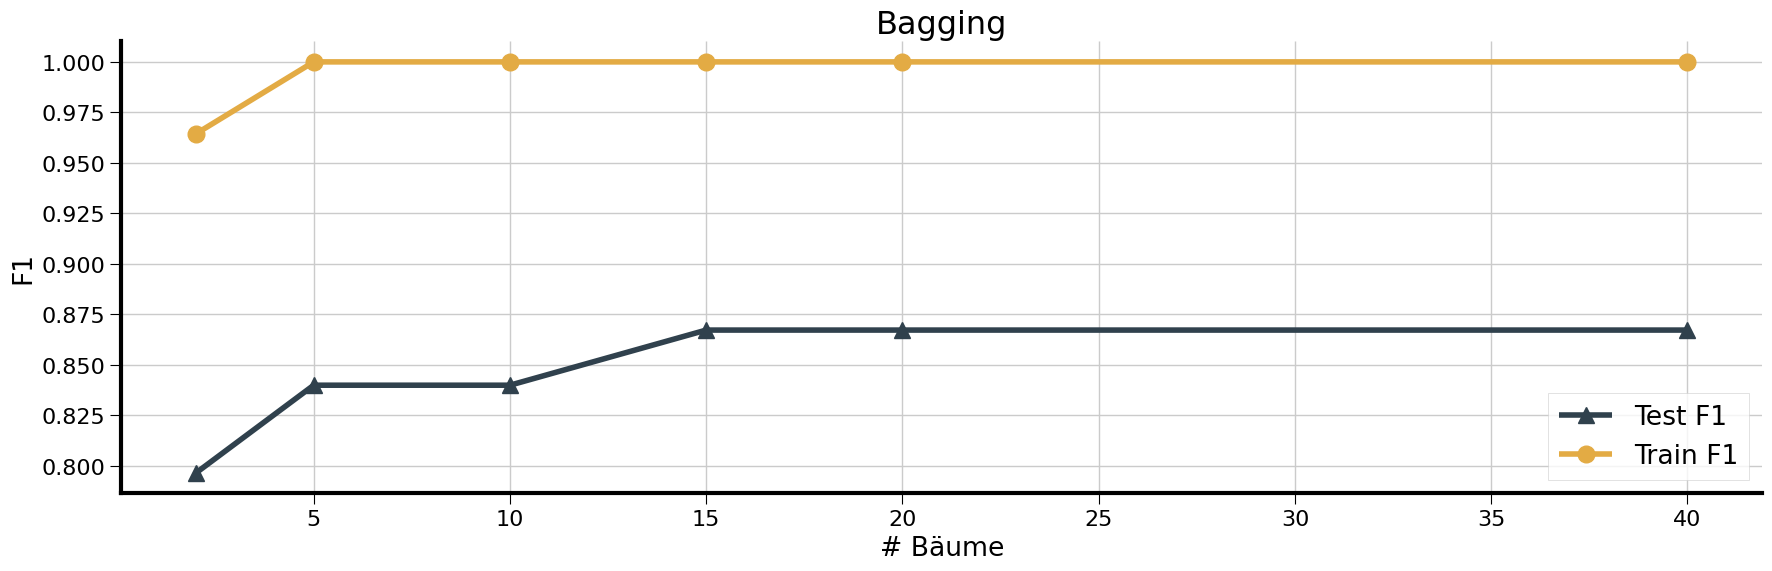

In [17]:
bs = [2, 5, 10, 15, 20, 40]
test_f1 = []
train_f1 = []
for b in bs:
    trees = bagging_trees(X_train, y_train,b=b)
    test_f1.append(f1_score(y_test, predict_bagged(X_test,trees), average='weighted', labels=[1, 2, 3]))
    train_f1.append(f1_score(y_train, predict_bagged(X_train, trees), average='weighted', labels=[1, 2, 3]))


# Plotte Lineare Regression für Elektro Motor
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

ax.plot(bs,test_f1, '-^',label='Test F1' )
ax.plot(bs,train_f1, '-o',label='Train F1' )

ax.legend()
plt.title('Bagging')
plt.ylabel('F1')
plt.xlabel('# Bäume')
plt.tight_layout()
plt.show()

# Random Forest

<center><img src="img/tafel_random_forest.png" width=30% class="stretch"></center>

* Anstelle von Zeilen wählen wir zufällig Spalten aus. 
* Wenn ein Parameter dominant ist, filtern wir ihn regelmäßig heraus.
* Zu einem gewissen Teil wird damit der Geiz des Algorithmus umgangen.
* In der Praxis hat es sich bewährt $m=\sqrt p$ Parameter zu behalten.

# Algorithmus Random Forest

<center><img style="float: right;" src="img/tafel_random_forest.png" width=30% class="stretch"></center>

1. Trainiere $b$ Entscheidungsbäume:
    * Jeder Baum trainiert auf einem zufällig gezogenen Anteil der Daten **(Spalten)**.
    * Die Bäume werden nicht gestutzt ($\text{min_leaf} = 1$).


2. Werte alle Entscheidungsbäume aus.
    * Die resultierende Klasse entspricht der Mehrheit der Entscheidungen.
    * (Regression) Die Resultierende entspricht dem Durchschnitt der Antworten.
    

# Random Forest in Python

In [18]:
# 1. Trainiere b Entscheidungsbäume
from random import choices

def random_forest(X_train, y_train, b=50):
    trees = []
    for i in range(b):
        cols = choices(X_train.columns, k=3)
        # Wir müssen uns die Spalten merken, auf die der Baum trainiert wurde
        trees.append([cols, DecisionTreeClassifier().fit(X_train[cols].values, y_train)])
    return trees

trees = random_forest(X_train, y_train)

In [19]:
# 2. Werte alle Entscheidungsbäume aus

def predict_random(X_test, trees):
    answers = []
    for x in X_test.iterrows():
        predictions = [t[1].predict(x[1][t[0]].values.reshape(1, -1)) for t in trees]
        answers.append(stats.mode(predictions)[0][0]) 
    return answers

y_predict = predict_random(X_test, trees)

f1_score(y_test, y_predict, average='weighted', labels=[1, 2, 3])

0.8617995928122509

# Zusammenfassung Random Forest

* Wählt zufällig Spalten und nicht Zeilen aus.
* Beispieldatensatz hat nur eine geringe Anzahl von Spalten .
* Jede Reduktion hat starke Auswirkungen.
* Performance in diesem Fall schwach.

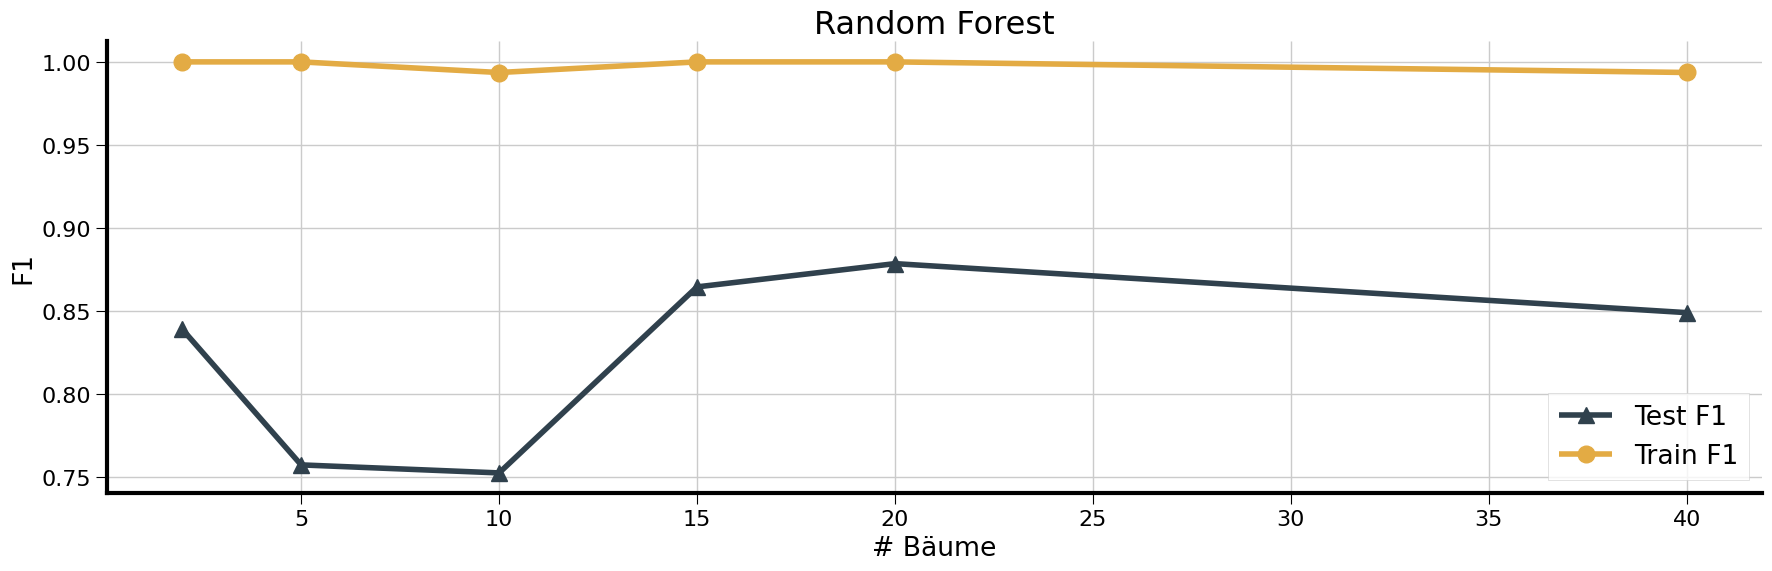

In [20]:
bs = [2, 5, 10, 15, 20, 40]
test_f1 = []
train_f1 = []
for b in bs:
    trees = random_forest(X_train, y_train,b=b)
    test_f1.append(f1_score(y_test, predict_random(X_test,trees), average='weighted', labels=[1, 2, 3]))
    train_f1.append(f1_score(y_train, predict_random(X_train, trees), average='weighted', labels=[1, 2, 3]))                    

fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

ax.plot(bs,test_f1, '-^',label='Test F1' )
ax.plot(bs,train_f1, '-o',label='Train F1' )

ax.legend()
plt.title('Random Forest')
plt.ylabel('F1')
plt.xlabel('# Bäume')
plt.tight_layout()
plt.show()

# Boosting

<center><img src="img/tafel_ada.png" width=30% class="stretch"></center>


* Bisher haben wir mehrere Bäume nebeneinander trainiert.
* Die Reihenfolge der Bäume hat keine Rolle gespielt.
* Es gab keine Interaktion zwischen den Bäumen.
* Beim Boosting versuchen wir einen Baum $b+1$ zu trainieren, der die Fehler der vorherigen $b$ Bäume korrigiert. 

# Ada Boosting

<center><img style="float: right;" src="img/tafel_ada.png" width=30% class="stretch"></center>

* Simple, aber weit verbreitete Boosting Strategie
* Mit jedem neuen Baum versuchen wir vorangegangene Fehler zu verkleinern:
    * Fitting wird angepasst.
    * Jeder Datensatz im Training wird gewichtet.
    * Wenn die Vorhersage falsch ist, wird sein Gewicht erhöht.

# Algorithmus Ada Boosting

1. Initialisiere alle Gewichte $w_n = (1/N, \dots, 1/N)$
2. Für b = 1:B Bäume wiederhole:
    1. Trainiere einen Entscheidungsbaum $DT_b(x_i)$, wobei die Trainingsdaten nach $w_n$ gewichtet sind
    2. Evaluiere das Ergebnis und berechne den Fehler zu: 
    **<center>$p(x) = sign(\sum_{i=1}^B \alpha_i DT_i(x)) \;\;\;\;\; err_b =  \frac{\sum_{1=1}^N{w_i I(y_i \neq G_b(x_i))}}{\sum_{i=1}^N w_i}$ </center>**
    3. Berechne den Koeffizienten $\alpha_b = ln((1-err)/err)$ 
    4. Für alle falschen Vorhersagen erhöhe $w_i = w_i e^{\alpha_b}$
4. Als Ergebnis wird die gemittelte, gewichtete Aussage aller Bäume verwendet.

# Discrete ADA Boost

* Wir wenden den Algorithmus für ein binäres Problem (*fuel_saver*) an.
* Multi-Class Probleme können umgesetzt werden, überschreiten aber den Rahmen der Veranstaltung.
* Gradient Boosted Trees in den gängigen Bibliotheken (sklearn, KNIME) können hierfür verwendet werden. 

In [21]:
# feature matrix
X = df[['horsepower', 'weight', 'displacement', 'cylinders', 'origin']]

# target vector
y = np.where(df['fuel_saver']==1, 1, -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ada Boost in Python

In [22]:
#1 Initialsiere Gewichte
w = np.ones(y_train.size)/y_train.size

#2 A Trainiere Entscheidungsbaum
t1 = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train, w)
y_predict = t1.predict(X_train) 

# 2.B Evaluiere
err_b = ((y_train!=y_predict)*w).sum()/w.sum()

# 2.C Koeffizient
alpha_b = 0.5 * np.log((1-err_b)/err_b)

w = w * np.where(y_train==y_predict, math.exp(-alpha_b), math.exp(alpha_b))
w = w/w.sum()

# Ada Boost nach Schritt 1

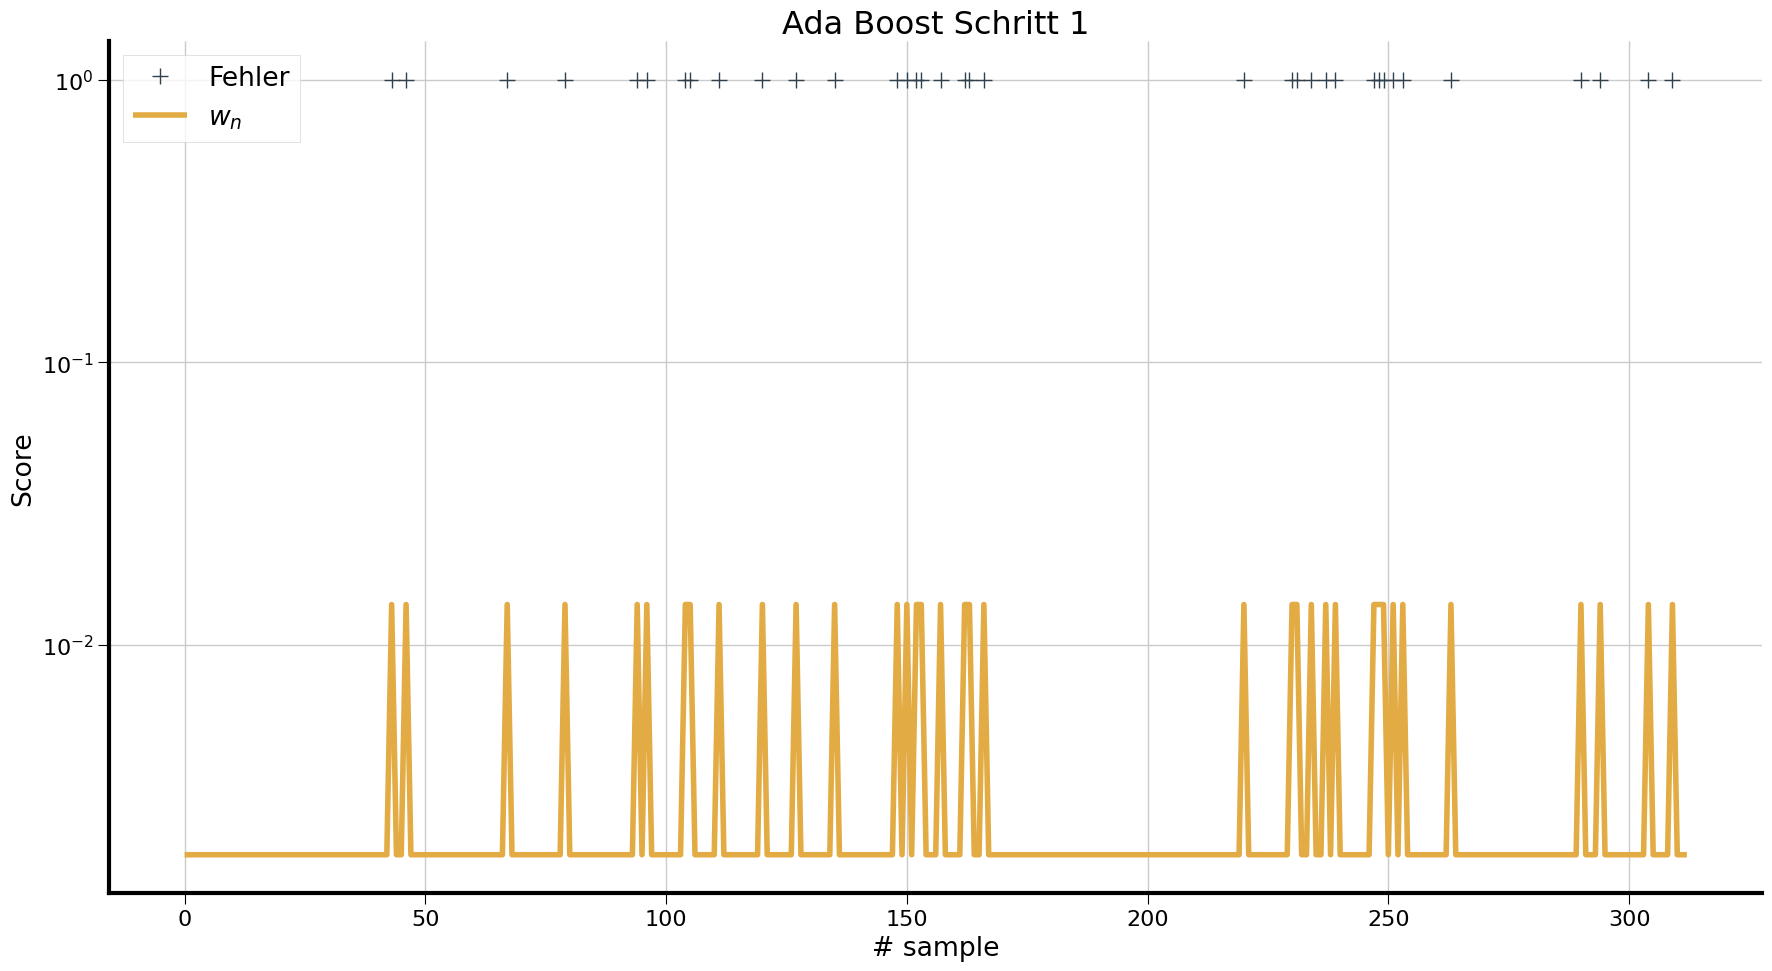

In [23]:
fig, ax = plt.subplots(1, 1, figsize=plot_size)

ax.plot(range(y_train.size),y_train != y_predict, '+',label='Fehler' )
ax.plot(range(y_train.size),w, '-',label='$w_n$' )

ax.legend()
ax.set_yscale("log", nonpositive='clip')
plt.title('Ada Boost Schritt 1')
plt.ylabel('Score')
plt.xlabel('# sample')
plt.tight_layout()
plt.show()

# Wiederhole die Schritte 1 - 3

In [24]:
t2 = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train, w)
y_predict2 = np.sign(t1.predict(X_train)+ alpha_b*t2.predict(X_train))

# 2.B Evaluiere
err_b = ((y_train!=y_predict2)*w).sum()/w.sum()

# 2.C Koeffizient

alpha_b2 = 0.5*np.log((1-err_b)/err_b)

w = w * np.where(y_train==y_predict, math.exp(-alpha_b2), math.exp(alpha_b2))
w = w/w.sum()

In [25]:
def ada_boost(X_train, y_train, trees, alphas, w, d=1, m=5):
    new_t = DecisionTreeClassifier(max_depth=d).fit(X_train, y_train, w)
    trees.append(new_t)
    
    y_predict = np.zeros(len(y_train))
    for t, a in zip(trees, alphas):
        y_predict += t.predict(X_train)*a
    y_predict = np.sign(y_predict)
    
    err_b = ((y_train!=y_predict)*w).sum()
    alpha_b = 0.5 * np.log((1-err_b)/err_b)
    alphas.append(alpha_b)
    w = w * np.where(y_train!=y_predict, math.exp(alpha_b), math.exp(-alpha_b))
    w = w/w.sum()
    
    if len(trees) != m:
        return ada_boost(X_train, y_train, trees, alphas, w, d, m)
    else: 
        return trees, alphas, w

# Ada Boost nach Schritt 2 bzw. 5

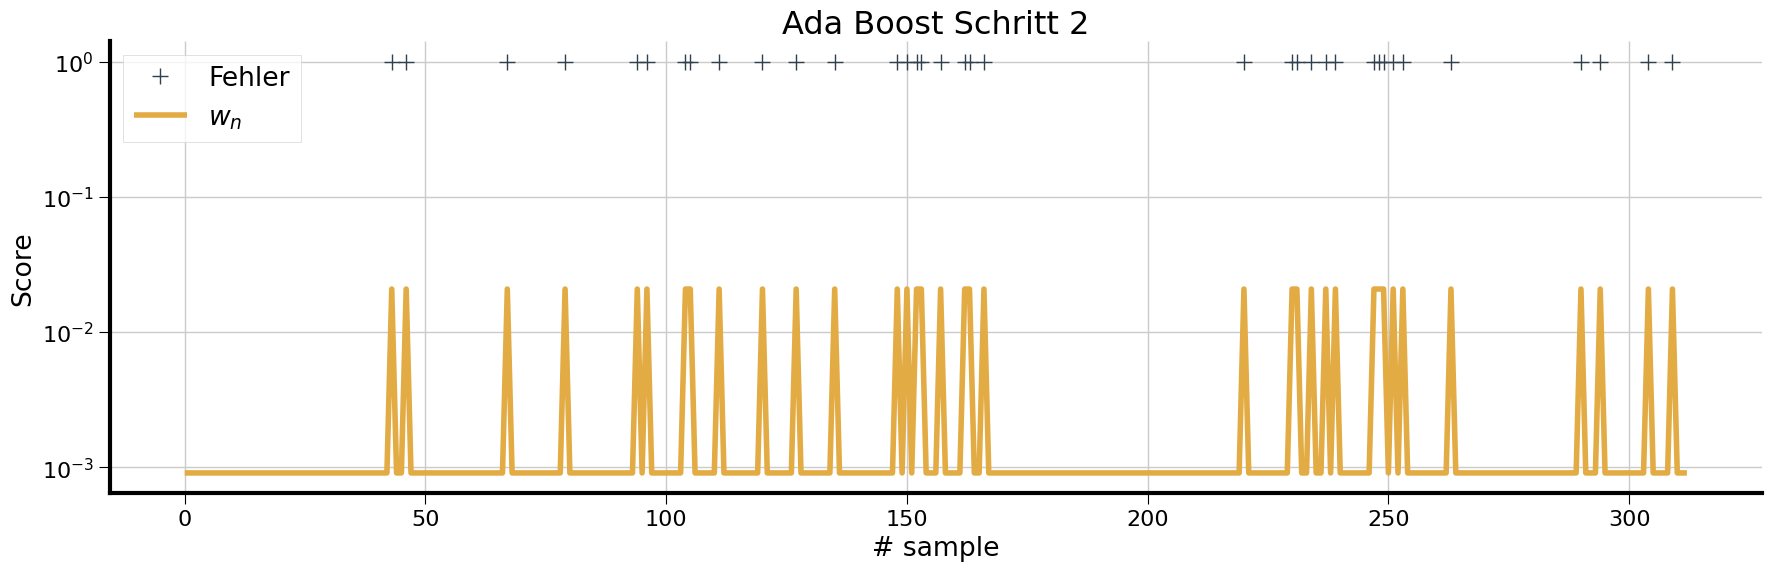

In [26]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)


ax.plot(range(y_train.size),y_train != y_predict, '+',label='Fehler' )
ax.plot(range(y_train.size),w, '-',label='$w_n$' )

ax.legend()
ax.set_yscale("log", nonpositive='clip')
plt.title('Ada Boost Schritt 2')
plt.ylabel('Score')
plt.xlabel('# sample')
plt.tight_layout()
plt.show()

In [27]:
trees, alphas, w = ada_boost(X_train, y_train, [], [1], np.ones(y_train.size)/y_train.size,m=5)

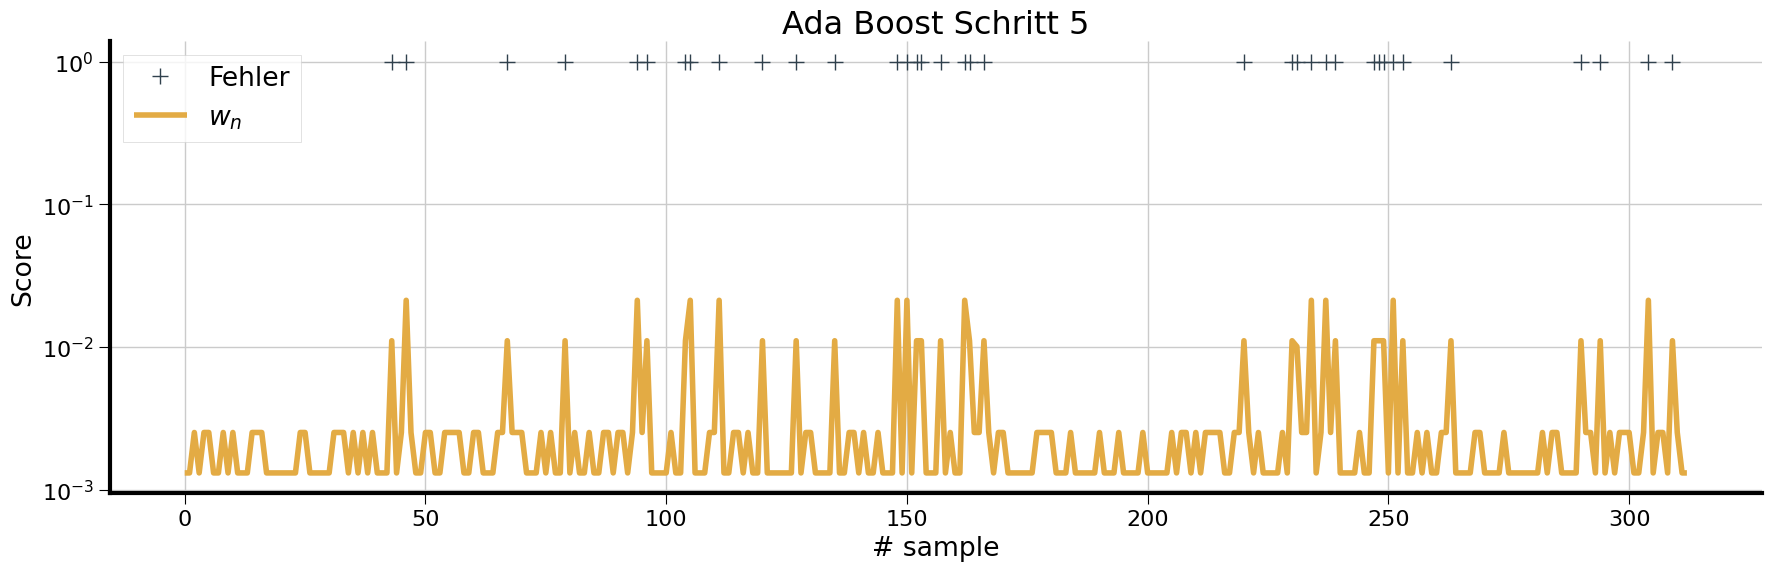

In [28]:
# Plotte Lineare Regression für Elektro Motor
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)


ax.plot(range(y_train.size),y_train != y_predict, '+',label='Fehler' )
ax.plot(range(y_train.size),w, '-',label='$w_n$' )

ax.legend()
ax.set_yscale("log", nonpositive='clip')
plt.title('Ada Boost Schritt 5')
plt.ylabel('Score')
plt.xlabel('# sample')
plt.tight_layout()
plt.show()

# Zurück zum Origin Beispiel

* Das Origin Beispiel hat mehrere Klassen und kann daher mir unserem einfachen diskreten ADA-Boost nicht gelöst werden. 
* Wir führen daher den weiter verbreiteten Gradient Boosted Tree ein, auch wenn wir uns eine Herleitung sparen werden müssen.


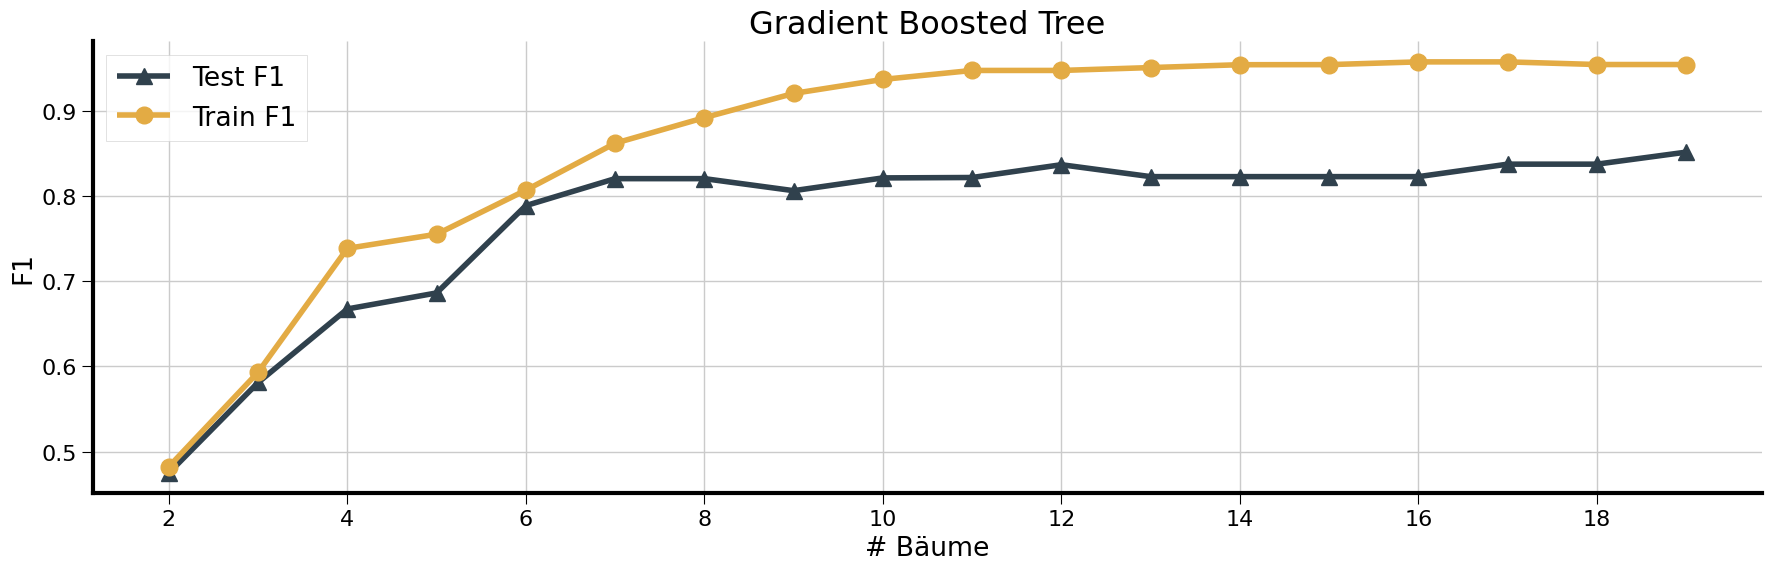

In [29]:
from sklearn import ensemble
from matplotlib.ticker import MaxNLocator

# feature matrix
X = df[['horsepower', 'weight', 'mpg', 'displacement', 'cylinders']]

# target vector
y = df['origin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

depth = range(2,20)

test_f1 = []
train_f1 = []
for d in depth:
    estimator = ensemble.GradientBoostingClassifier(n_estimators=d, random_state=0, max_depth=4)
    estimator.fit(X_train, y_train)
    test_f1.append(f1_score(y_test, estimator.predict(X_test), average='weighted', labels=[1, 2, 3]))
    train_f1.append(f1_score(y_train, estimator.predict(X_train), average='weighted', labels=[1, 2, 3]))

fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

ax.plot(depth,test_f1, '-^',label='Test F1' )
ax.plot(depth,train_f1, '-o',label='Train F1' )

ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Gradient Boosted Tree')
plt.ylabel('F1')
plt.xlabel('# Bäume')
plt.tight_layout()
plt.show()

# Zusammenfassung Boosting

* Jeder neue Baum versucht den Fehler der vorherigen zu minimieren.
* Kann mit Bagging und Random Forest kombiniert werden.
* Einer der mächtigsten Klassifizierungsalgorithmen.
    * Populär als XGBoost bekannt.
    * Gewinner div. Kaggle Competitions.

# Zusammenfassung Ensemble

<center><img src="img/ensemble.png" width=60% class="stretch"></center>

* Die unter der Überschrift "Wälder" eingeführten Methoden entspringen dem Ensemble Modelling. 
* Könnten Sie diese auch auf anderen Modelle anwenden? Wenn ja, wie?
